# EXPLORING LEGO DATA (OVER 60 YEARS)
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;">In this project, we will analyze a dataset on every single lego block that has ever been built.</span></p>
<p> <img src= "datasets\lego-bricks.png"></p>

# DATA
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;">A complete database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the representation is shown below.</span></p>
<p> <img src="https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png"></p>

In [136]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt

# EXPLORING COLORS
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;">Let us start by reading in the colors data to get a sense of the diversity of lego sets.</span></p>
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;"><ul>1. <strong>id</strong> - id of color.</ul></span></p>
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;"><ul>2. <strong>name</strong> - Name of color.</ul></span></p>
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;"><ul>3. <strong>rgb</strong> - RGB color value.</ul></span></p>
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;"><ul>4. <strong>is_trans</strong> - True/False statements on the transparency of colors</ul></span></p>

In [137]:
#Read colors data
colors = pd.read_csv("Data-Jupyter\Exploring 67 years of LEGO\datasets\colors.csv")

#Print the first five rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [138]:
# Check if data is clean
print('Dimensionality of color dataframe:', colors.shape, '\n')
print('Number of duplicates:', colors.duplicated().sum(), '\n')
print('Data Types\n' + '-' *10)
print(colors.dtypes, '\n')
print('Sum of missing values in each column\n' + '-'*36)
print(colors.isna().sum(), '\n')

Dimensionality of color dataframe: (135, 4) 

Number of duplicates: 0 

Data Types
----------
id           int64
name        object
rgb         object
is_trans    object
dtype: object 

Sum of missing values in each column
------------------------------------
id          0
name        0
rgb         0
is_trans    0
dtype: int64 



In [139]:
#Distinct colors available
num_colors = colors.rgb.size
print('The number of distinct colors:', num_colors)

The number of distinct colors: 135


In [140]:
#Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


# EXPLORING LEGO SETS
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;">Another interesting dataset available in the database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained.</span></p> 

In [141]:
#Read sets data
sets = pd.read_csv("Data-Jupyter/Exploring 67 years of LEGO\datasets\sets.csv")

#Print the first 5 rows
print(sets.head(),"\n")

  set_num                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle  1970       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12 



In [142]:
# Check if data is clean
print('Dimensionality of color dataframe:', sets.shape, '\n')
print('Number of duplicates:', sets.duplicated().sum(), '\n')
print('Data Types\n' + '-' *10)
print(colors.dtypes, '\n')
print('Sum of missing values in each column\n' + '-'*36)
print(sets.isna().sum(), '\n')

Dimensionality of color dataframe: (11866, 5) 

Number of duplicates: 0 

Data Types
----------
id           int64
name        object
rgb         object
is_trans    object
dtype: object 

Sum of missing values in each column
------------------------------------
set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64 



In [143]:
#Total number of sets
num_sets = sets.shape[0]
print('The total number of sets of all lego blocks made:', num_sets)

The total number of sets of all lego blocks made: 11866


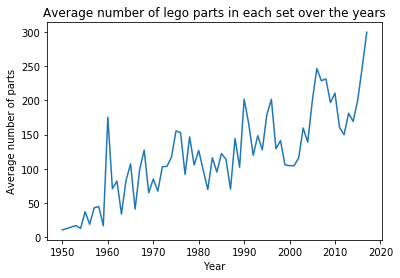

In [144]:
# Summary of average number of parts by year
parts_by_year = sets.groupby('year')['num_parts'].mean()

# Plot of average number of parts by year
plt_parts_B_Y = parts_by_year.plot(kind= 'line', title= 'Average number of lego parts in each set over the years')
plt_parts_B_Y.set_xlabel('Year')
plt_parts_B_Y.set_ylabel('Average number of parts')
plt.show()

# LEGO THEMES OVER YEARS
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;">Lego blocks ship under multiple themes. Let us try to get a sense of how the number of themes shipped has varied over the years</span></p> 

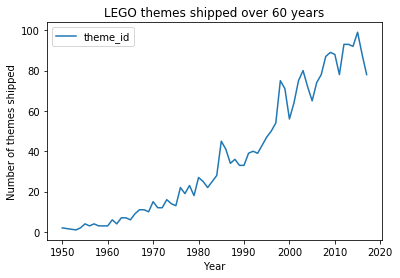

In [145]:
# Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index= False).agg({'theme_id': pd.Series.nunique})
theme_plt = themes_by_year.plot(kind= 'line', x= 'year', y= 'theme_id', title= 'LEGO themes shipped over 60 years')
theme_plt.set_xlabel('Year')
theme_plt.set_ylabel('Number of themes shipped')
plt.show()

# WRAPPING IT ALL UP
<p><span style="color:black; font-family: 'Bebas Neue'; font-size: 1.3em;">Lego blocks offer an unlimited amount of fun accross ages. We explored interesting trends around colors, parts and themes. We noticed that, LEGO has become successful and innovative over the years. </span></p> 